## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
# Explore data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
study_results_complete = pd.merge(study_results,mouse_metadata, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
study_results_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

# Checking the number of mice
len(study_results_complete['Mouse ID'].unique())


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_complete[['Mouse ID','Timepoint']].value_counts()


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [8]:
# Get all the data for the duplicate mouse ID
study_results_complete[(study_results_complete['Mouse ID']=='g989')]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

cleaned_data=study_results_complete.drop(study_results_complete[(study_results_complete['Mouse ID']=='g989')].index)
cleaned_data.head()

    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame
len(cleaned_data['Mouse ID'].unique())


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume_mean=cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_volume_median=cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_var=cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std=cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem=cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary dataframe.
summary_stat={
    "Mean Tumor Volume" : tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_var,
    "Tumor Volume Std. Dev.": tumor_volume_std,
    "Tumor Volume Std. Err.": tumor_volume_sem      
}

df_summary_stat = pd.DataFrame(summary_stat)
df_summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']}) 



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


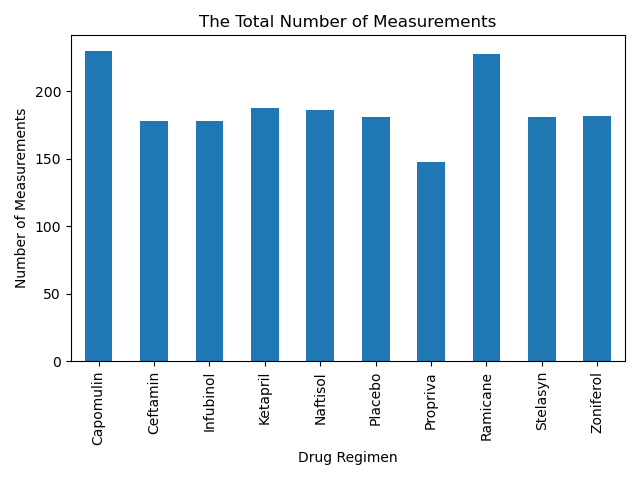

In [13]:
# Generate a bar plot showing the total number of measurements taken for each drug regimen using pandas.

total_measurements=cleaned_data.groupby(['Drug Regimen'])['Timepoint'].count()

total_number_barplot= total_measurements.plot.bar()

# set axis labels and title
total_number_barplot.set_title("The Total Number of Measurements")
total_number_barplot.set_xlabel("Drug Regimen")
total_number_barplot.set_ylabel("Number of Measurements")

plt.show()

# resize plot to display labels
plt.tight_layout()


<IPython.core.display.Javascript object>


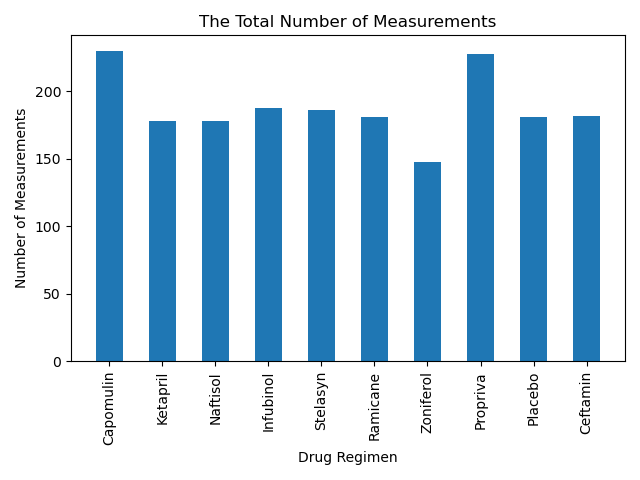

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x = np.arange(len(cleaned_data['Drug Regimen'].unique()))
y = cleaned_data.groupby(['Drug Regimen'])['Timepoint'].count()

# set axis labels and title
tick_label = cleaned_data['Drug Regimen'].unique()
plt.xticks(np.arange(0,10,1), tick_label, rotation='vertical')
plt.title("The Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")


plt.bar(x,y, width=0.5)

plt.show()

# resize plot to display labels
plt.tight_layout()




In [15]:
gender_distribution=cleaned_data.groupby(['Sex'])['Sex'].count()
gender_distribution

Sex
Female    922
Male      958
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


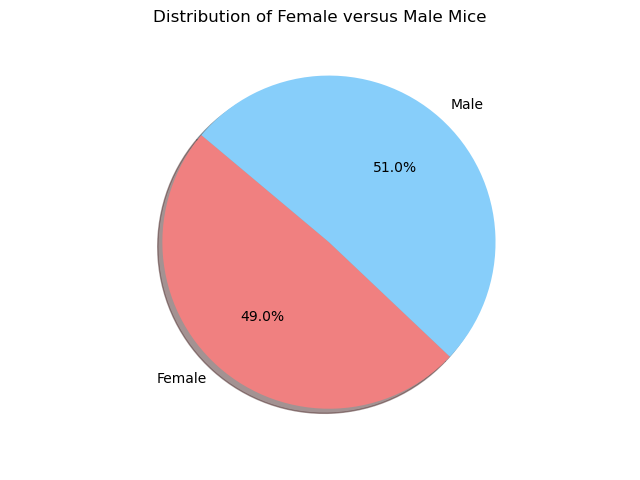

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

title=title="Distribution of Female versus Male Mice"

# The colors of each section of the pie chart
colors=colors=["lightcoral", "lightskyblue"]

gender_distribution.plot(kind="pie", subplots=True, title=title, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140 )
plt.axis('equal')
plt.ylabel('')

plt.show()



<IPython.core.display.Javascript object>


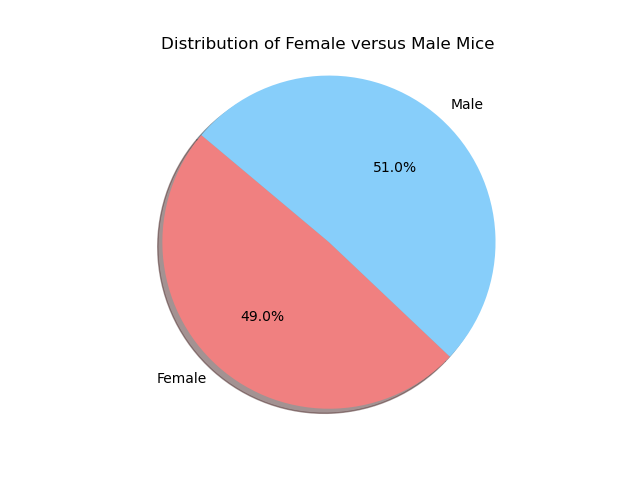

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of the pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = gender_distribution

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')


plt.show()



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepnt_last = cleaned_data[['Mouse ID','Timepoint']].groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_final=pd.merge(timepnt_last, cleaned_data, on=('Mouse ID', 'Timepoint'))


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# create a new df with four drug regiments only
drugs_of_int=tumor_vol_final[tumor_vol_final['Drug Regimen'].isin(treatment_list)] 
  
    
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    ser_x=drugs_of_int['Tumor Volume (mm3)'].loc[(drugs_of_int['Drug Regimen']==i)]  
    tumor_vol_list.append(ser_x)

    # Calculate the IQR for each drug
    quartiles = ser_x.quantile([.25,.5,.75])

    lowerq = quartiles[0.25] 
    upperq = quartiles[0.75]  
    iqr = upperq-lowerq         
    
    print(f"The lower quartile of {i} is: {lowerq}")
    print(f"The upper quartile of {i} is: {upperq}")
    print(f"The interquartile range of {i} is: {iqr}")
    print(f"The median of {i} is: {quartiles[0.5]}")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} or above {upper_bound} could be outliers \n")




The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 or above 51.83201549 could be outliers 

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 or above 54.30681135 could be outliers 

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below 36.83290494999999 or above 82.74144559000001 could be outliers 

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.851955

<IPython.core.display.Javascript object>


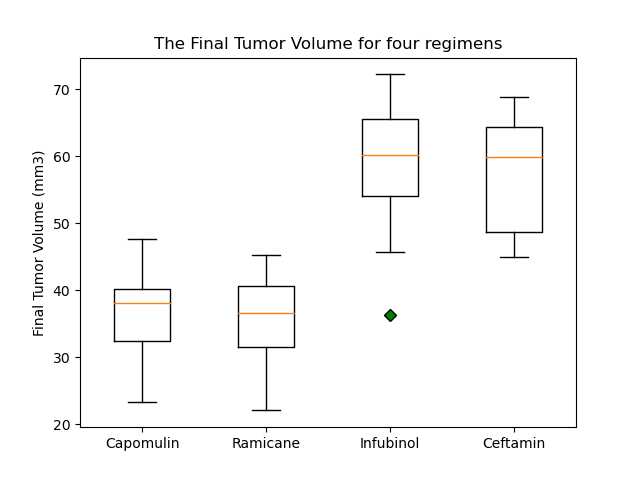

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# change outlier symbols and color
green_diamond = dict(markerfacecolor='g', marker='D')

fig1, ax1 =plt.subplots()

plt.boxplot(tumor_vol_list, flierprops=green_diamond)

plt.title("The Final Tumor Volume for four regimens")
plt.xticks(np.arange(1,5), treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")


plt.show()



## Line and Scatter Plots

In [22]:
# To find out Mouse treated wdith Capomulin (preview first 5)
cleaned_data[['Mouse ID','Drug Regimen']].loc[cleaned_data['Drug Regimen']=='Capomulin',:].head()


,Mouse ID,Drug Regimen
0,b128,Capomulin
226,j246,Capomulin
227,r554,Capomulin
228,s185,Capomulin
229,b742,Capomulin


In [23]:
# Select a mouse that was treated with Capomulin
capomulin_mouse=cleaned_data[(cleaned_data['Mouse ID']=='r554')]
capomulin_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
227,r554,0,45.000000,0,Capomulin,Female,8,17
433,r554,5,45.781746,1,Capomulin,Female,8,17
498,r554,10,39.005494,2,Capomulin,Female,8,17
808,r554,15,35.463758,2,Capomulin,Female,8,17
940,r554,20,36.015589,2,Capomulin,Female,8,17
1243,r554,25,33.893345,3,Capomulin,Female,8,17
1340,r554,30,32.680655,3,Capomulin,Female,8,17
1534,r554,35,33.069337,3,Capomulin,Female,8,17
1734,r554,40,31.804841,3,Capomulin,Female,8,17
1788,r554,45,32.377357,3,Capomulin,Female,8,17


<IPython.core.display.Javascript object>


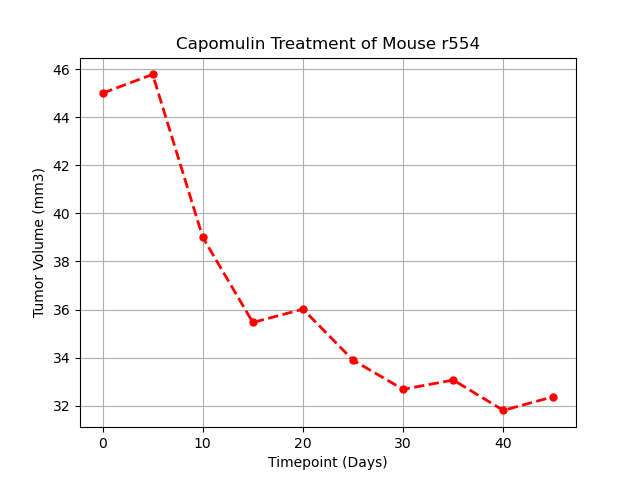

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x = capomulin_mouse['Timepoint']
y = capomulin_mouse['Tumor Volume (mm3)']

plt.plot(x,y, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=5)

# Give the chart some labels and a tile
plt.title("Capomulin Treatment of Mouse r554")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# add Grid
plt.grid()

plt.show()


<IPython.core.display.Javascript object>


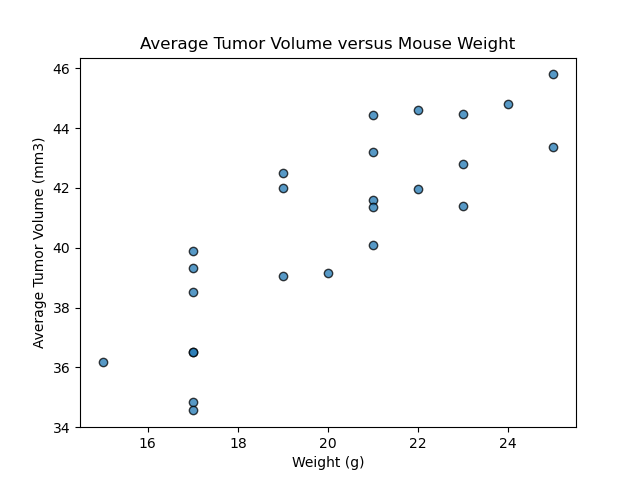

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# create a new df with Capomulin records only
capomulin_df=cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin'])]

# calculate an average
capomulin_avg=capomulin_df.groupby(['Mouse ID']).mean()

# plot average tumor volume vs mouse weight on a scatterplot
x = weight = capomulin_avg["Weight (g)"]
y = avg_tumor_volume = capomulin_avg['Tumor Volume (mm3)']

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# Give the chart some labels and a tile
plt.title("Average Tumor Volume versus Mouse Weight")
plt.xlabel("Weight (g)")    
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


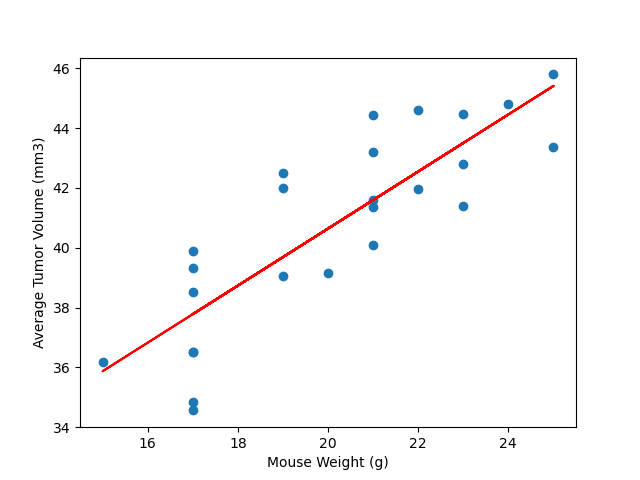

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# calculate the Pearson correlation coefficient between mouse weight and average tumor volume
correlation = sts.pearsonr(weight, avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# plot average tumor volume vs mouse weight on a scatterplot
x_values = weight
y_values = avg_tumor_volume

# add the linear regression line on top of the scatter plot 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()

